# Assignment 5
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### In This assignment we are going to achieve below mentioned goals:
* #### Introducing Image normalization
* #### Use of L2 regularization
* #### Using ReLU after Batch Normalization
* #### Running the new code for 40 epochs and save the model with highest validation accuracy
* #### Finding out 25 misclassified images from the validation dataset and create an image gallery

### So to achieve the goal lets first install keras library with which we are going to build the model and  import all pakages from keras with which we are going to build the CNN model

In [0]:
# https://keras.io/
!pip install -q keras
import keras

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.regularizers import l2

from keras.datasets import mnist

### Now we are going to load the pre-shuffled MNIST data. Out of total 70k data we have 60k hand written image as train data and 10k hand written image as test data which is autometically predefined in mnist dataset.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


### Let's see how our MNIST data looks like in below. Here we can see the 5th hand written digit in X_train as 2 in the displayed image.

(60000, 28, 28)


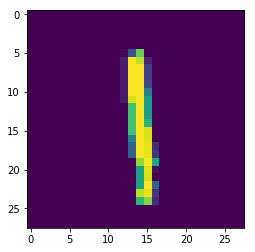

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[8])

### Now we have to shape all the image size in test and train so that we can apply out CNN model based on the input image shape and we will not have any problem while testing with test images with same shape. Let's shape train and test data to (28 , 28 , 1) which is going to be the input dimension of our model.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Here in the below section we are going to scale our pixel values to 0-1. So to train a robust we must scale the pixcel values.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Now lets normalize the image set as we have mention to achieve this in the begining:

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
iterator = datagen.flow(X_train, y_train, batch_size=len(X_train), shuffle=False)
trainX, trainy = iterator.next()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


### Let's see how Y looks like as Y values are the actual no corrosponding to an hand written image.

In [0]:
trainy[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### Now we have to convert Y values from 1-dimentional class matrix to 10 dimentional class matrix so that we can predict out of 10 class which class it is predicting.

In [0]:
trainy = np_utils.to_categorical(trainy, 10)
Y_test = np_utils.to_categorical(y_test, 10)
trainy[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Now let's build our CNN model which we are going to apply on our train data for training the model later. Here we are going to use 2-D convolution, maxpooling, dropout, batch normalization and softmax activation function to get output.

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(12, 3, 3, input_shape=(28,28,1), kernel_regularizer=l2(0.001)))#26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Convolution2D(15, 3, 3, kernel_regularizer=l2(0.001)))#24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, kernel_regularizer=l2(0.001)))#22
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(12, 1, 1, kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(12, 3, 3, kernel_regularizer=l2(0.001)))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(15, 3, 3, kernel_regularizer=l2(0.001)))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, kernel_regularizer=l2(0.001)))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, kernel_regularizer=l2(0.001)))#5
model.add(Activation('relu'))
model.add(Convolution2D(10, 5, 5))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (1, 1), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipy

### Lets's compile the model with adam optimizer ,loss as cross entropy and accuracy as validation matrix. After compiling the model we are going to train it with training data and let's see how much training accuracy we get after training completion. Here we have used batch size as 128 and total no of epoch 40 to train the model.

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])


In [0]:
# checkpoint
filepath="best_model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint]


model.fit(trainX, trainy, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 10s 168us/step - loss: 0.3688 - acc: 0.9136 - val_loss: 0.3027 - val_acc: 0.9276

Epoch 00001: val_acc improved from -inf to 0.92760, saving model to best_model.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 7s 121us/step - loss: 0.1399 - acc: 0.9776 - val_loss: 0.1434 - val_acc: 0.9766

Epoch 00002: val_acc improved from 0.92760 to 0.97660, saving model to best_model.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 8s 128us/step - loss: 0.1103 - acc: 0.9817 - val_loss: 0.1179 - val_acc: 0.9769

Epoch 00003: val_acc improved from 0.97660 to 0.97690, saving model to best_model.hdf5
Epoch 4/40

Epoch 00004: LearningRateScheduler setting l

### Now Let's load the best model and let's check the validation accuracy:

In [0]:
model.load_weights('best_model.hdf5')
score = model.evaluate(X_test, Y_test, verbose=0)
y_pred = model.predict(X_test)
print(score)

[0.02902609195113182, 0.9951]


### As we can see we have already achieved 99.51% accuracy in validation set. Now lets see the missclassified images and lets find out 25 such images and let's see actually what they look like:

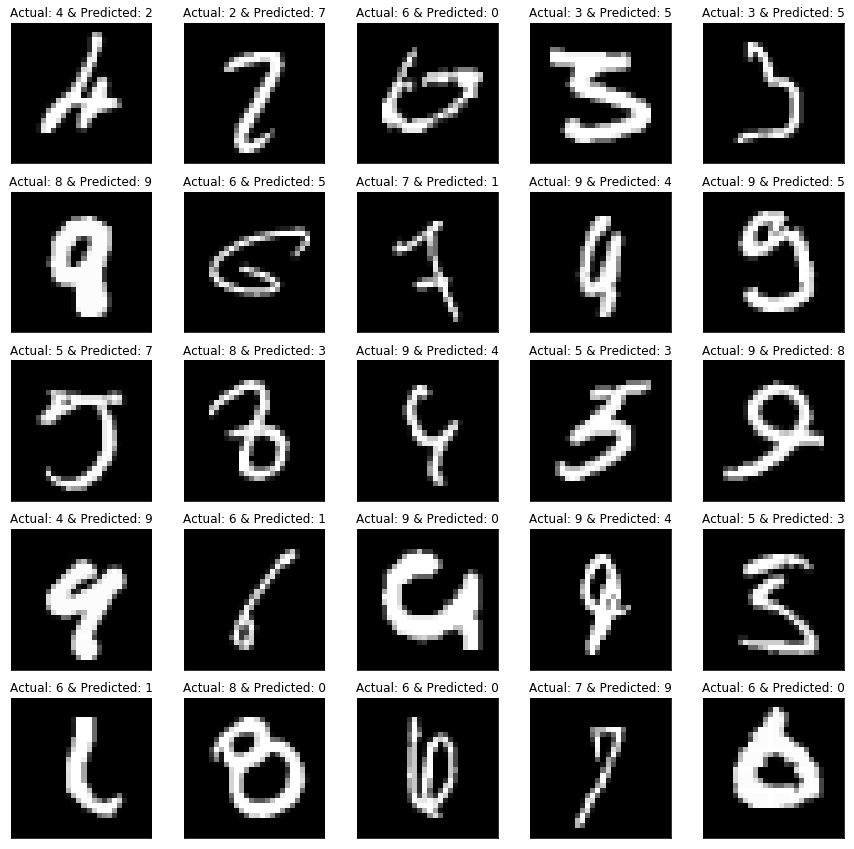

In [0]:
# getting index of all misclasified images
img_index = []
for i in range(1,X_test.shape[0]):
  if np.argmax(y_pred[i])!=y_test[i]:
    img_index.append(i)

    # function to reconvert image array to an 0-255 scale    
def image_reconstract(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

# Storing 25 misclassified images into a variable after converting them  into 0-255 scale. Also, storing actual and predicted output values for those images
img_actual = [] 
img_actual_value = []
img_pred_value = []
for i in range(1,26):
    img_req = np.array(X_test[img_index[i-1]]).reshape((28, 28)).astype(np.float64)
    img_req = image_reconstract(img_req).reshape((28, 28))
    img_actual.append(img_req)
    img_actual_value.append(y_test[img_index[i-1]])
    img_pred_value.append(np.argmax(y_pred[img_index[i-1]]))

# Plotting all 25 images    
row = 5
col = 5
fig=plt.figure(figsize=(15, 15))
for i in range(0,row*col):
  fig.add_subplot(row,col,i+1)
  plt.imshow(img_actual[i],cmap='gray') 
  plt.title('Actual: '+str(img_actual_value[i])+' & Predicted: '+str(img_pred_value[i]))
  plt.xticks([])
  plt.yticks([])
plt.show() 

### So, above cell we can see such 25 images for which our model wrongly classified them. Also, we can see the acutual and predicted values of these 25 images to get some idea of maybe how our model wrongly classified them. We can see that these 25 images though they are actually different but at some extent they look like predicted value. We can even introduce some image augmentation strategy by looking at these images so that out model performs even better.